# Percentile Method

1. Take max and min percentile of data for better result like(99% max and 1%min).
2. Make boxplot and check distribution.
3. Trimming or capping.

## Import Libaraies:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset:

In [3]:
df=pd.read_csv('../Data/placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


**We see the cgpa column 100percentile is 9.12 and 0percentile is 4.89** 

**Now make plot and check distribution**

<Axes: xlabel='cgpa'>

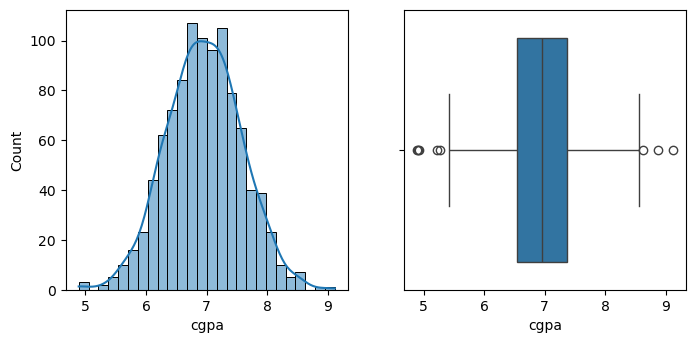

In [5]:
plt.figure(figsize=(8,8))
ax=plt.subplot(2,2,1)

sns.histplot(df['cgpa'],kde=True)

ax=plt.subplot(2,2,2)

sns.boxplot(df['cgpa'],orient='h')

**Distribution is normal but there is some outliers lets remove them**

In [6]:
upperlimit=df['cgpa'].quantile(0.99)
print('Upper limit is',upperlimit)

lowerlimit=df['cgpa'].quantile(0.1)
print('Lower limit is',lowerlimit)

Upper limit is 8.4201
Lower limit is 6.19


In [7]:
df[(df['cgpa'] >= upperlimit) | (df['cgpa'] <= lowerlimit)] 

,cgpa,placement_exam_marks,placed
13,5.68,26.0,0
23,6.05,11.0,0
32,5.91,11.0,1
37,8.51,9.0,1
71,6.13,20.0,1
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


**Out of 1000 rows 113 rows are outlier lets remove them or cap them i depend on your choice**

### Trimming

In [8]:
new_df=df[(df['cgpa'] <= upperlimit) & (df['cgpa'] >= lowerlimit)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
989,6.23,31.0,0
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1


**Lets check the difference before and after trimming**

Text(0.5, 1.0, 'After Trimming')

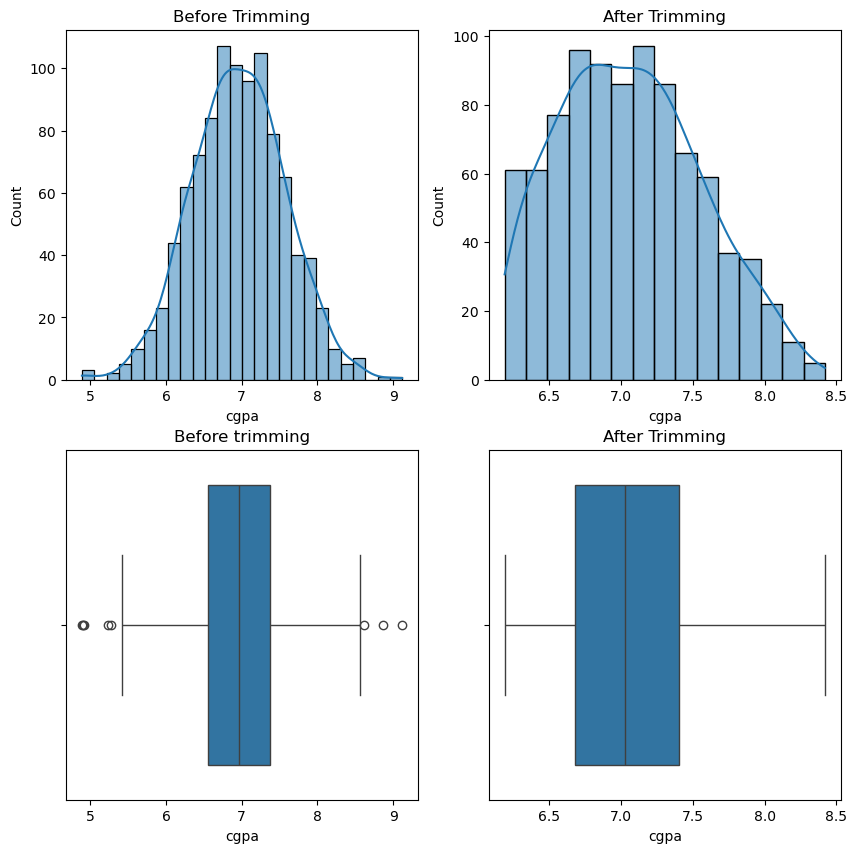

In [9]:
plt.figure(figsize=(10,10),)
ax=plt.subplot(2,2,1)

#Before trmming distribution
sns.histplot(df['cgpa'],kde=True)
plt.title('Before Trimming')

ax=plt.subplot(2,2,2)
#After trmming distribution
sns.histplot(new_df['cgpa'],kde=True)
plt.title('After Trimming')

ax=plt.subplot(2,2,3)
#Before trimming boxplot
sns.boxplot(df['cgpa'],orient='h')
plt.title('Before trimming')

ax=plt.subplot(2,2,4)
#After trimming boxplot
sns.boxplot(new_df['cgpa'],orient='h')
plt.title('After Trimming')

### Capping

In [10]:
df['cap_cgpa']=np.where(df['cgpa'] >= upperlimit,
        upperlimit,
        np.where(df['cgpa'] <= lowerlimit,
        lowerlimit,
        df['cgpa']))

df['cap_cgpa'].shape

(1000,)

In [11]:
df

,cgpa,placement_exam_marks,placed,cap_cgpa
0,7.19,26.0,1,7.1900
1,7.46,38.0,1,7.4600
2,7.54,40.0,1,7.5400
3,6.42,8.0,1,6.4200
4,7.23,17.0,0,7.2300
...,...,...,...,...
995,8.87,44.0,1,8.4201
996,9.12,65.0,1,8.4201
997,4.89,34.0,0,6.1900
998,8.62,46.0,1,8.4201
